<a href="https://colab.research.google.com/github/peculab/DFTDescriptorPipeline/blob/main/examples/heck_boronic_acids/heck_boronic_acids.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!rm -rf /usr/local/lib/python3.11/dist-packages/descriptors

In [2]:
# ✅ Reset environment
%cd /content
import shutil, os, sys, importlib

# 🔁 Uninstall pip-installed descriptors
!pip uninstall -y descriptors

# 🔥 Clear cached modules
for k in list(sys.modules.keys()):
    if k.startswith("descriptors"):
        del sys.modules[k]

# 🧹 Remove previous repo
if os.path.exists("DFTDescriptorPipeline"):
    shutil.rmtree("DFTDescriptorPipeline")

/content


In [3]:
# ✅ Install required packages
!pip install morfeus-ml scikit-learn joblib matplotlib openpyxl

# ✅ Clone the latest repo
!git clone https://github.com/peculab/DFTDescriptorPipeline.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.0/95.0 kB 3.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=9b900d639a80eb57fbb4f90163c311e3bbc4f5b9ccf310a3656fed0aa66814d6
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire
Cloning into 'DFTDescriptorPipeline'...
remote: Enumerating objects: 535, done.
remote: Counting objects: 100% (214/214), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 535 (delta 110), reused 100 (delta 39), pack-reused 321 (from 1)
Receiving objects: 100% (535/535), 35.43 MiB | 32.37 MiB/s, done.
Resolving deltas: 100% (318/318), done.


In [4]:
# ✅ Set module path
from morfeus import read_xyz, Sterimol
from morfeus.utils import get_radii

import shutil, os, sys, importlib
sys.path.insert(0, "/content/DFTDescriptorPipeline/descriptors")
import extractor_regr
import glob, os
importlib.reload(extractor_regr)

<module 'extractor_regr' from '/content/DFTDescriptorPipeline/descriptors/extractor_regr.py'>


[STEP1] Read Excel: /content/DFTDescriptorPipeline/examples/heck_boronic_acids/Heck_boronic_acid.xlsx

==== [1/17] [H] Processing log: /content/DFTDescriptorPipeline/examples/heck_boronic_acids/logfiles/H.log ====
  polarizability: 87.51266666666668
  HOMO: -0.32424, LUMO: -0.02742
  dipole: 2.0759
  nbo_section: ok
Found C1: 7, C2: 6, A: 9, B: 15, D: 8, F: 1, G: 5
  atom index: c=7, e=6, a=9, b=15, d=8, f=1, g=5
  NBO values: 1.99444, -1.02072, 1.9761, -0.83143
  NBO charges: C1=0.80505, C2=-0.18103, O1=-0.6028, O2=-0.70145
  frequencies: I_C_O=391.1211, v_C_O=1848.0264
  C1, C2, L_C1_C2: (-1.696707, 0.12287, 0.000112), (-0.214245, 0.02993, 4.8e-05), 1.4853724883476196

==== [2/17] [o-F] Processing log: /content/DFTDescriptorPipeline/examples/heck_boronic_acids/logfiles/o-F.log ====
  polarizability: 87.94933333333334
  HOMO: -0.32231, LUMO: -0.03326
  dipole: 2.0237
  nbo_section: ok
Found C1: 7, C2: 6, A: 9, B: 15, D: 8, F: 1, G: 5
  atom index: c=7, e=6, a=9, b=15, d=8, f=1, g=5
 

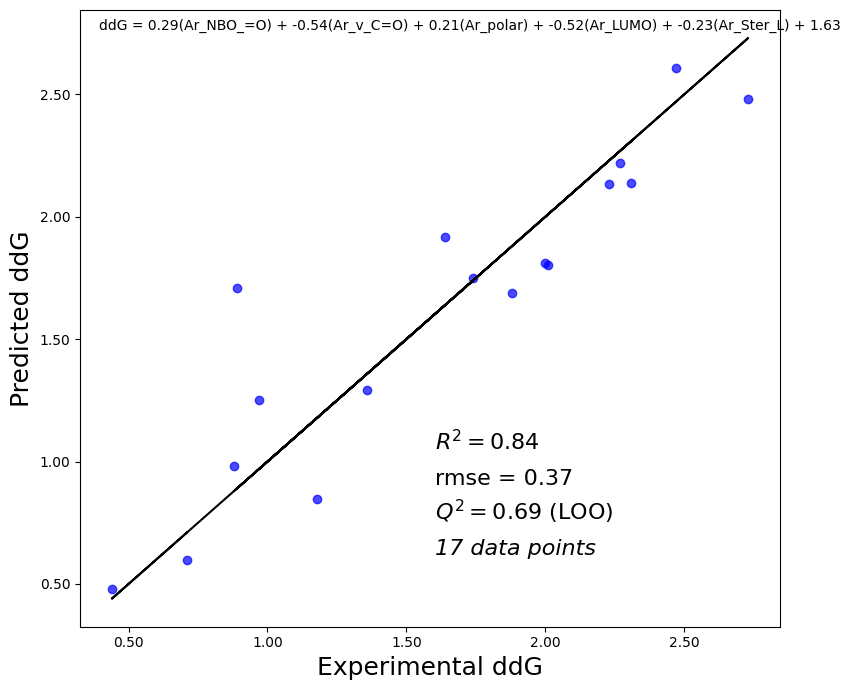


[STEP4] Analysis complete!


In [5]:
# Specify folder and file path
data_dir = "/content/DFTDescriptorPipeline/examples/heck_boronic_acids"
xlsx_path = glob.glob(os.path.join(data_dir, "*.xlsx"))[0]
log_folder = os.path.join(data_dir, "logfiles")

# One-click execution
df, results, best_model = extractor_regr.run_full_pipeline(
    log_folder=log_folder,
    xlsx_path=xlsx_path
)